FOOD AND DRINK ESTABLISHMENT INDUSTRY REVIEW 2002-2017 FOR ZIP CODES 44113-44115

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json

In [2]:
#importing csv
csv_path = "cpbzipcode.csv"

# Import the Business File as a DataFrame
business_df = pd.read_csv(csv_path, encoding="utf-8")
business_df.head()

,Year,zip,naics,est,n1_4,n5_9,n10_19,n20_49,n50_99,n100_249,n250_499,n500_999,n1000
0,2002,44115,115114,1,0,0,0,0,1,0,0,0,0
1,2002,44115,115116,1,0,0,1,0,0,0,0,0,0
2,2002,44114,212312,1,0,0,0,0,0,0,0,1,0
3,2002,44113,212393,1,0,0,0,0,0,1,0,0,0
4,2002,44114,221122,2,0,0,1,0,1,0,0,0,0


In [3]:
#Rename Headers
reduced_df = business_df[["Year ","zip","naics","est"]]
reduced_df.head()

,Year,zip,naics,est
0,2002,44115,115114,1
1,2002,44115,115116,1
2,2002,44114,212312,1
3,2002,44113,212393,1
4,2002,44114,221122,2


In [4]:
renamed_df = reduced_df.rename(columns={"Year ": "Year",
                                        "zip": "Zip Code",
                                        "naics": "NAICS Code",
                                        "est": "Total Establishments", })
renamed_df.head()

,Year,Zip Code,NAICS Code,Total Establishments
0,2002,44115,115114,1
1,2002,44115,115116,1
2,2002,44114,212312,1
3,2002,44113,212393,1
4,2002,44114,221122,2


In [5]:
# Looking only at Food Service Type Businesses Only Per NAICS Codes
food_services = renamed_df.loc[renamed_df["NAICS Code"].str.match('722')]
food_services.head(10)

,Year,Zip Code,NAICS Code,Total Establishments
909,2002,44113,722110,53
910,2002,44114,722110,42
911,2002,44115,722110,36
912,2002,44113,722211,28
913,2002,44114,722211,32
914,2002,44115,722211,19
915,2002,44113,722212,5
916,2002,44114,722212,1
917,2002,44115,722212,1
918,2002,44113,722213,14


In [6]:
# Extract the following columns: "Year", "Total Establishments"

eatery_services_df = food_services[["Year", "Total Establishments"]]
eatery_services_df.head(10)

,Year,Total Establishments
909,2002,53
910,2002,42
911,2002,36
912,2002,28
913,2002,32
914,2002,19
915,2002,5
916,2002,1
917,2002,1
918,2002,14


In [12]:
# Group Each Year's Total Food Service Establishments

grouped_food_df = pd.DataFrame(eatery_services_df.groupby(['Year']).sum())

# In order to be visualized, a data function must be used..

grouped_food_df.head(20)



,Total Establishments
Year,
2002,369
2003,361
2004,359
2005,356
2006,363
2007,344
2008,344
2009,336
2010,340


In [ ]:
#Reset Index
grouped_food_df.reset_index(inplace=True)

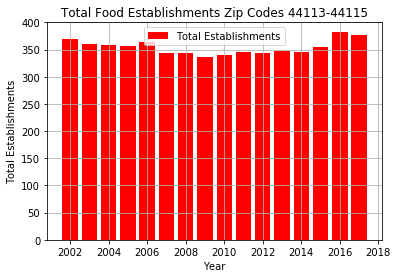

In [10]:
# Line Graph for Food Establishments

x_axis = grouped_food_df['Year']
y_axis = grouped_food_df['Total Establishments']

plt.bar(x_axis, y_axis, color='red', label = "Total Establishments")
plt.legend(loc="best")
plt.grid(True)
plt.title("Total Food Establishments Zip Codes 44113-44115")
plt.ylim(0, 400)
plt.xlabel("Year")
plt.ylabel("Total Establishments")
plt.show()
